# TASK 5

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Sample dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

c:\Users\Mariana\anaconda3\envs\myenv\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Import data

df = pd.read_csv('US_Accidents_March23.csv')


# EDA

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [70]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [9]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

### City Analysis

In [11]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [10]:
accidents_by_city=df.City.value_counts().sort_values(ascending=False)
accidents_by_city

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [20]:
# Top 20 cities with the most accidents
df['City'].value_counts().sort_values(ascending=False).head(20)

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

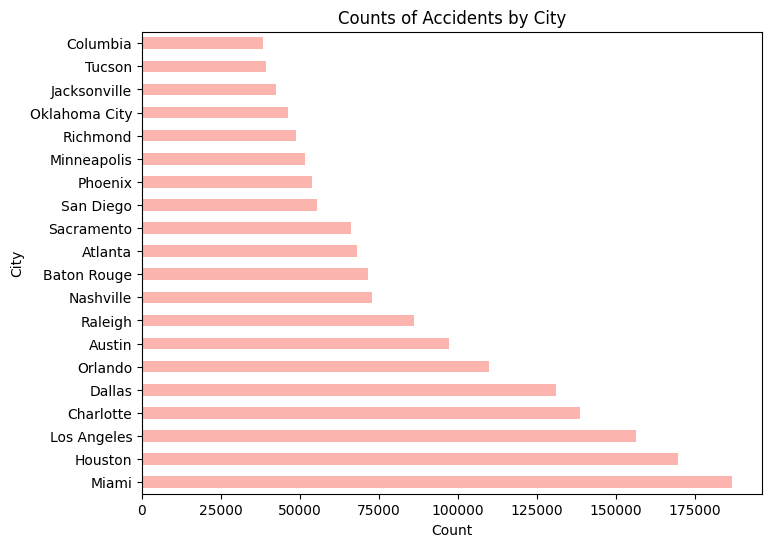

In [88]:
plt.figure(figsize=(8, 6))
accidents_by_city[:20].plot(kind="barh", colormap="Pastel1")
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Counts of Accidents by City')
plt.show()


In [23]:
# The 20 cities with less accidents
df['City'].value_counts().sort_values(ascending=True).head(20)

City
American Fork-Pleasant Grove    1
Fluker                          1
Sidney Center                   1
Bon Secour                      1
Atlantic Mine                   1
Everglades City                 1
Indian Valley                   1
Stromsburg                      1
Star Junction                   1
Bruington                       1
Cooks                           1
Platte Center                   1
Curlew                          1
Downing                         1
Mapleville                      1
Stockton Springs                1
Okaton                          1
Mohall                          1
Vashon                          1
East China                      1
Name: count, dtype: int64

### Severity

In [72]:
df.Severity.unique()

array([3, 2, 1, 4], dtype=int64)

In [79]:
#Count of accidents by severity
Accident_Severity = df['Severity'].value_counts().reset_index()
Accident_Severity

,Severity,count
0,2,6156981
1,3,1299337
2,4,204710
3,1,67366


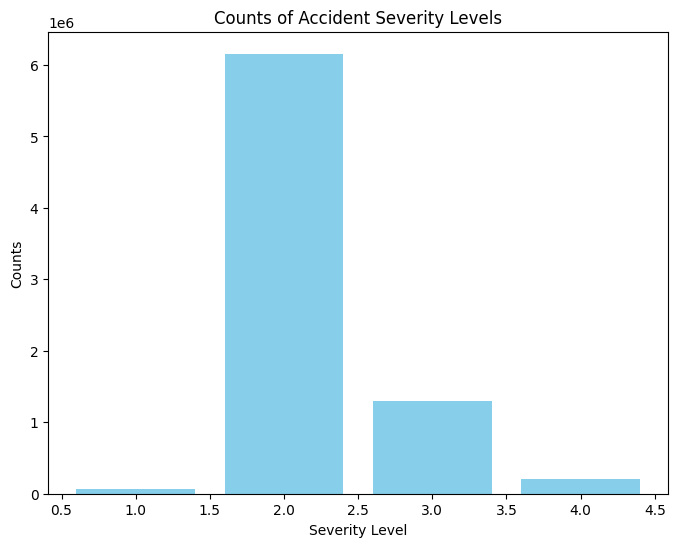

In [82]:
plt.figure(figsize=(8, 6))
plt.bar(Accident_Severity['Severity'], Accident_Severity['count'], color='skyblue')
plt.xlabel('Severity Level')
plt.ylabel('Counts')
plt.title('Counts of Accident Severity Levels')
plt.show()

### Weather Analysis

In [58]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [65]:
weather_counts = df['Weather_Condition'].value_counts().head(15)

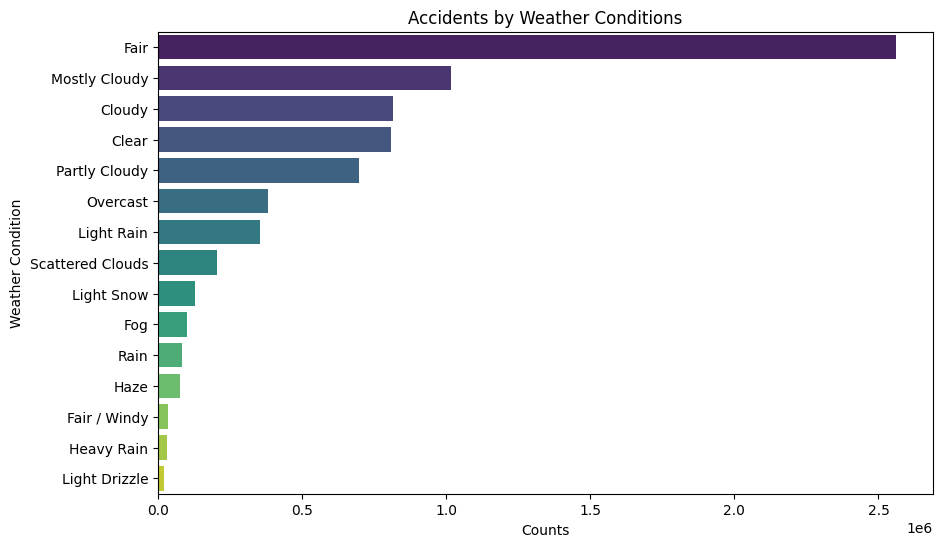

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="viridis")
plt.xlabel('Counts')
plt.ylabel('Weather Condition')
plt.title('Accidents by Weather Conditions')
plt.show()

### Time

In [25]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [27]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [28]:
hour = df['Start_Time'].dt.hour

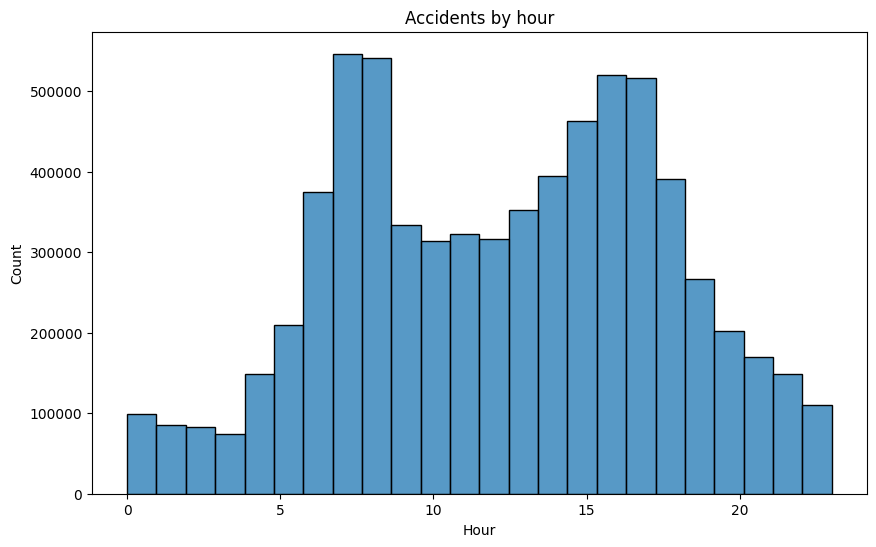

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(hour, bins=24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour')
plt.show()


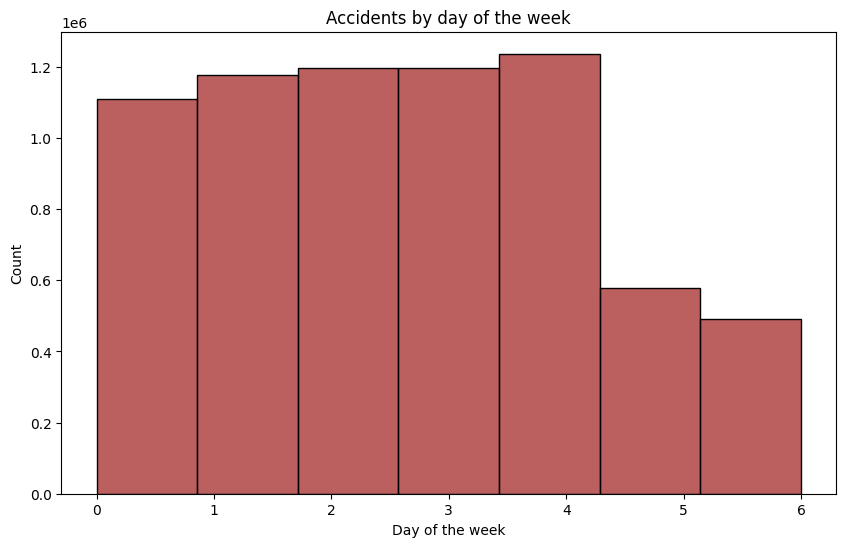

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Start_Time.dt.dayofweek, color = "brown",  bins=7, kde=False)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Accidents by day of the week')
plt.show()



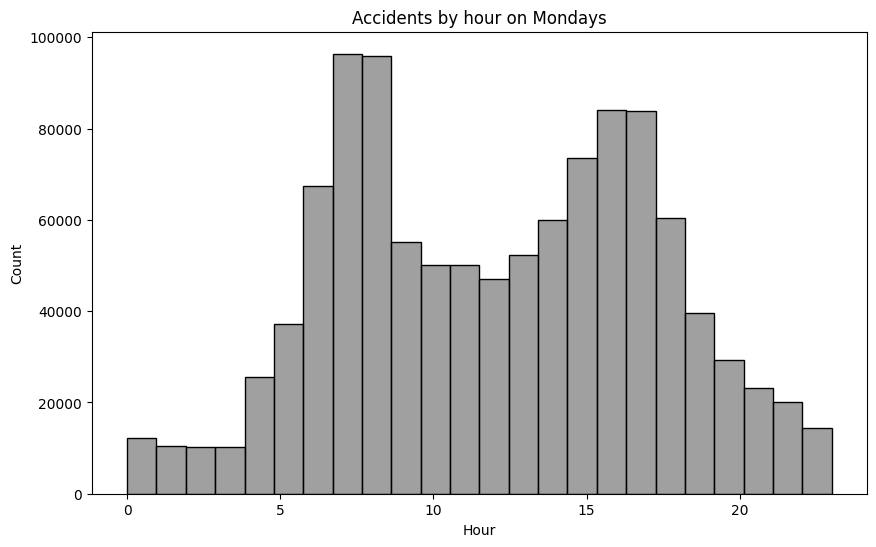

In [91]:
Monday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
plt.figure(figsize=(10, 6))
sns.histplot(Monday_accidents.dt.hour, color = "grey", bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Mondays')
plt.show()


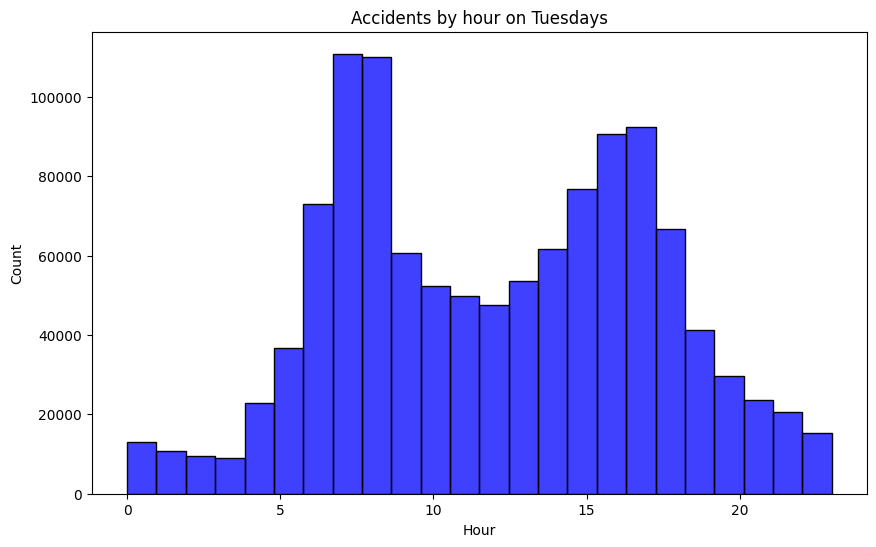

In [92]:
Tuesday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
plt.figure(figsize=(10, 6))
sns.histplot(Tuesday_accidents.dt.hour, color = "blue", bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Tuesdays')
plt.show()



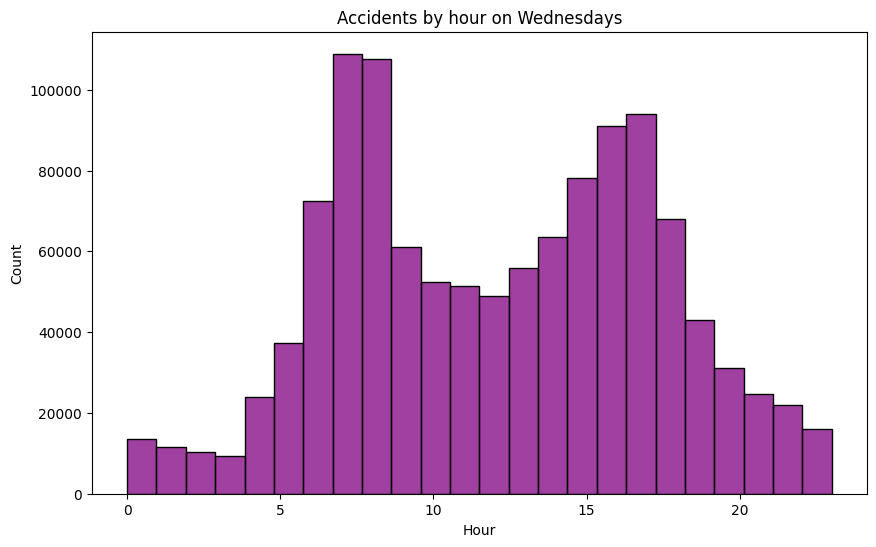

In [93]:
Wednesday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
plt.figure(figsize=(10, 6))
sns.histplot(Wednesday_accidents.dt.hour,color = "purple",  bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Wednesdays')
plt.show()



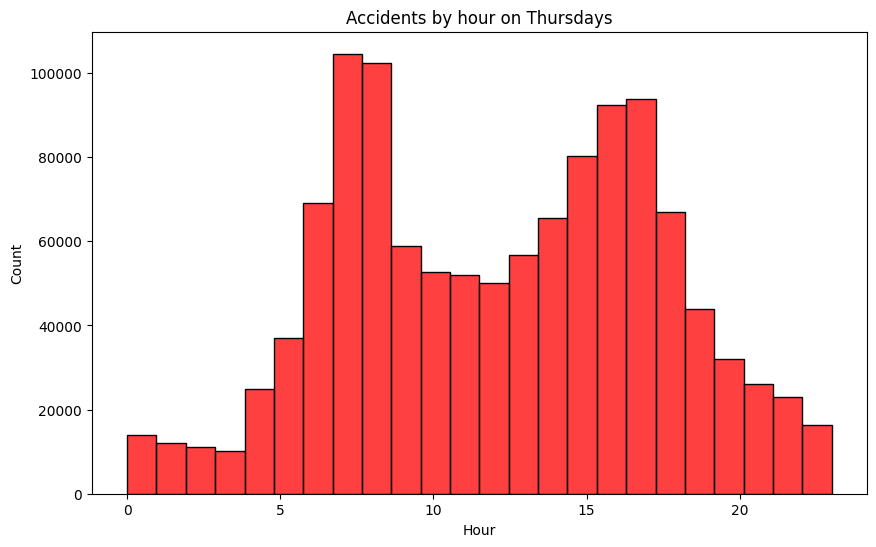

In [94]:
Thursday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
plt.figure(figsize=(10, 6))
sns.histplot(Thursday_accidents.dt.hour, color = "red", bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Thursdays')
plt.show()



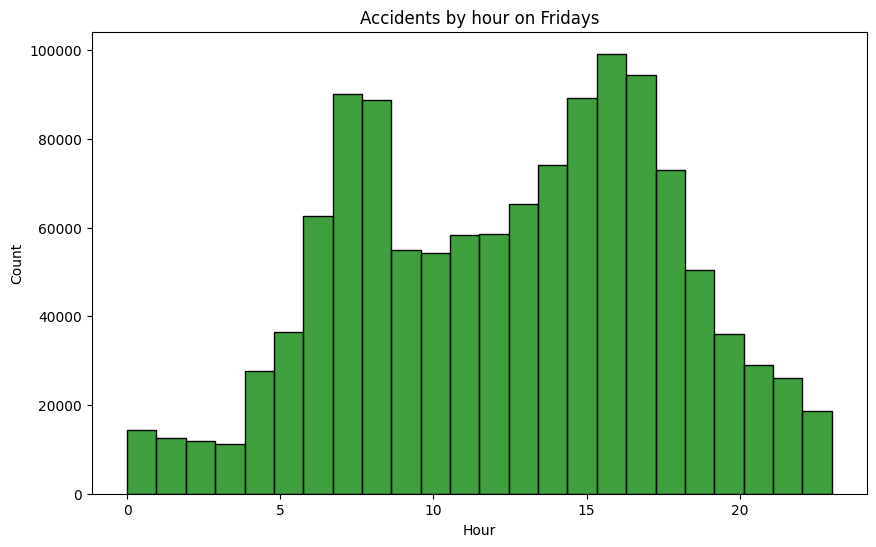

In [95]:
Friday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
plt.figure(figsize=(10, 6))
sns.histplot(Friday_accidents.dt.hour, color = "green", bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Fridays')
plt.show()


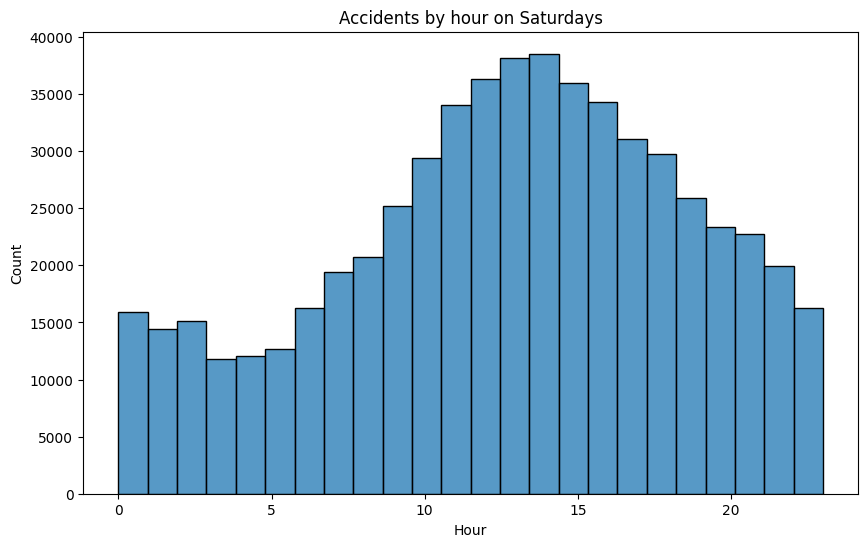

In [96]:
Saturday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
plt.figure(figsize=(10, 6))
sns.histplot(Saturday_accidents.dt.hour, bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Saturdays')
plt.show()


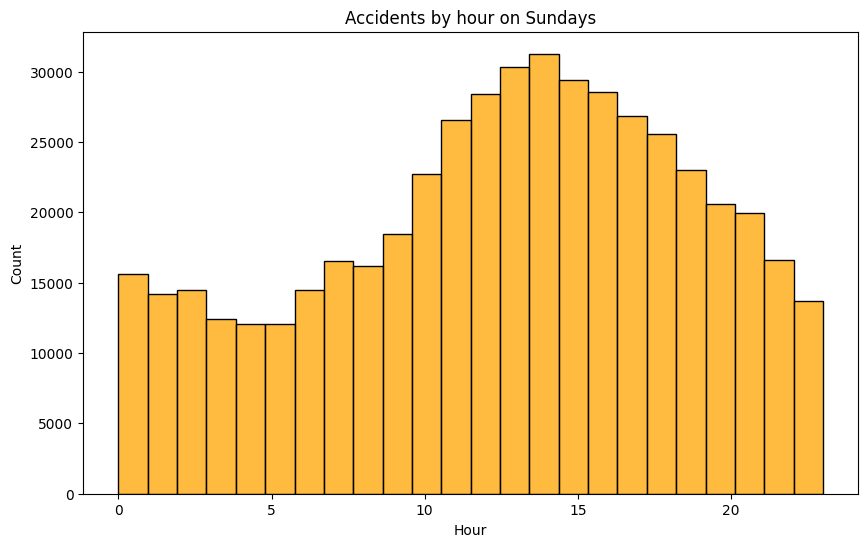

In [97]:
Sunday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
plt.figure(figsize=(10, 6))
sns.histplot(Sunday_accidents.dt.hour, color = "orange", bins=24, kde=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Accidents by hour on Sundays')
plt.show()


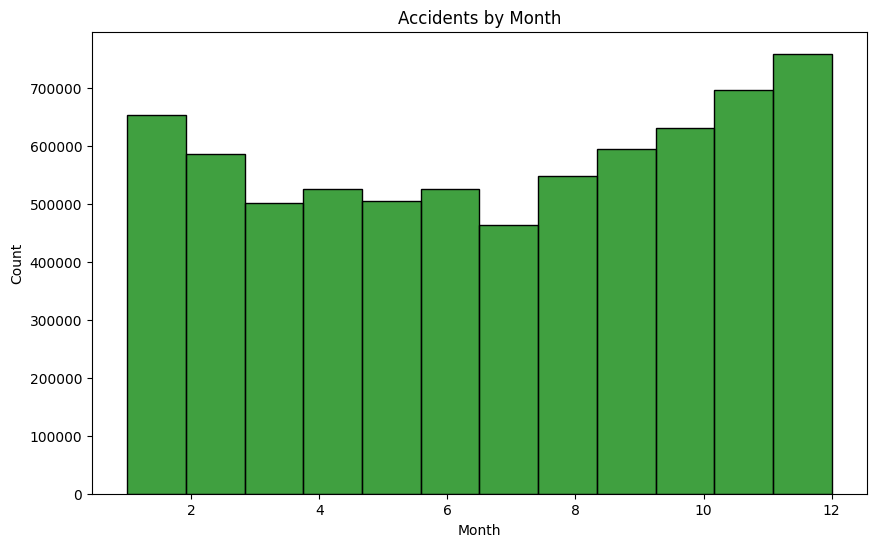

In [98]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Start_Time'].dt.month, color = "green", bins=12);
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents by Month')
plt.show()


### Location

In [53]:
df['Start_Lat']

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [54]:
df['Start_Lng']

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

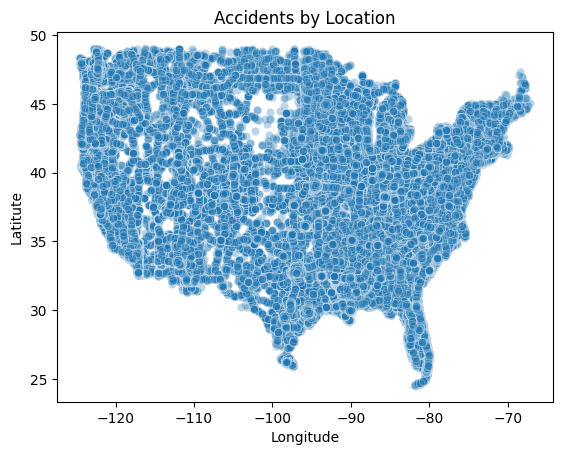

In [99]:
sns.scatterplot(data=df,x='Start_Lng',y='Start_Lat',alpha=0.3);
plt.xlabel('Longitude')
plt.ylabel('Latitute')
plt.title('Accidents by Location')
plt.show()
